# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

# Library Imports

## Overview
This section lists the Python libraries imported for data preprocessing, modeling, and visualization in the analysis of the soil measures dataset.

- **pandas (aliased as pd)**: Used for data manipulation and analysis.
- **numpy (aliased as np)**: Provides support for numerical operations.
- **matplotlib.pyplot (aliased as plt)**: Used for creating visualizations.
- **sklearn.linear_model.LogisticRegression**: Implements the logistic regression model.
- **sklearn.model_selection.train_test_split**: Splits data into training and testing sets.
- **sklearn.model_selection.GridSearchCV**: Performs hyperparameter tuning with cross-validation.
- **sklearn.preprocessing.StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **sklearn.metrics.accuracy_score**: Computes the accuracy of the model predictions.
- **sklearn.metrics.classification_report**: Generates a detailed report of classification metrics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## Data Loading
The dataset is loaded into a pandas DataFrame using the following Python code:
- **Command**: `crops = pd.read_csv("soil_measures.csv")`

## Data Quality Check
A preliminary check for missing values is performed to ensure data integrity:

- **Method**: `crops.isna().sum()`
- **Output**: Printed to console to display the count of missing values for each column.
- **Command**: `print("Missing values:\n", crops.isna().sum())`

## Feature and Target Separation
The dataset is split into features and the target variable to prepare for modeling:

- **Features (X)**: All columns except the target variable `crop`, extracted using `crops.drop(columns="crop")`.
- **Target (y)**: The `crop` column, assigned using `crops["crop"]`.

In [3]:
# Load data
crops = pd.read_csv("soil_measures.csv")

# Check for missing values
print("Missing values:\n", crops.isna().sum())

# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

Missing values:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64


# Feature Preprocessing and Data Split

## Feature Standardization
- **Tool**: `StandardScaler` from `sklearn.preprocessing`
- **Action**: Standardizes the feature matrix `X` to have zero mean and unit variance.
- **Command**: 
  ```python
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
# Data Splitting
- **Method:** train_test_split from sklearn.model_selection
- **Split**: 80% training, 20% testing
- **Random State**: 42 for reproducibility

In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Training and Evaluation

## Model Fitting
- **Model**: Multinomial Logistic Regression
- **Parameters**: `multi_class='multinomial'`, `solver='lbfgs'`, `max_iter=2000`, `class_weight='balanced'`, `random_state=42`
- **Action**: Fits the model to the training data


## Hyperparameter Tuning
- **Method**: GridSearchCV with 5-fold cross-validation
- **Parameter Grid**: `C` values [0.01, 0.1, 1, 10]
- **Action**: Optimizes the model and selects the best parameters

## Model Evaluation
- **Action**: Predicts on test set and evaluates performance
- **Metrics**: Accuracy and detailed classification report


In [6]:
# Fit multinomial logistic regression with class weights
logreg = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
logreg = grid.best_estimator_

# Evaluate model
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'C': 10}
Accuracy: 0.6840909090909091
Classification Report:
               precision    recall  f1-score   support

       apple       0.82      0.39      0.53        23
      banana       1.00      1.00      1.00        21
   blackgram       0.80      0.60      0.69        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.77      0.74      0.75        27
      coffee       0.81      0.76      0.79        17
      cotton       0.89      1.00      0.94        17
      grapes       0.46      0.86      0.60        14
        jute       0.52      0.57      0.54        23
 kidneybeans       0.42      0.55      0.48        20
      lentil       0.30      0.64      0.41        11
       maize       0.95      1.00      0.98        21
       mango       0.48      0.63      0.55        19
   mothbeans       0.50      0.33      0.40        24
    mungbean       0.58      0.58      0.58        19
   muskmelon       0.58      0.65      0.61        17
 

## Feature Importance Analysis

### Calculate Feature Importance
- **Method**: Computes the mean absolute value of coefficients across classes
- **Variables**: 
  - `feature_importance`: Mean absolute coefficients
  - `features`: Column names from feature matrix `X`


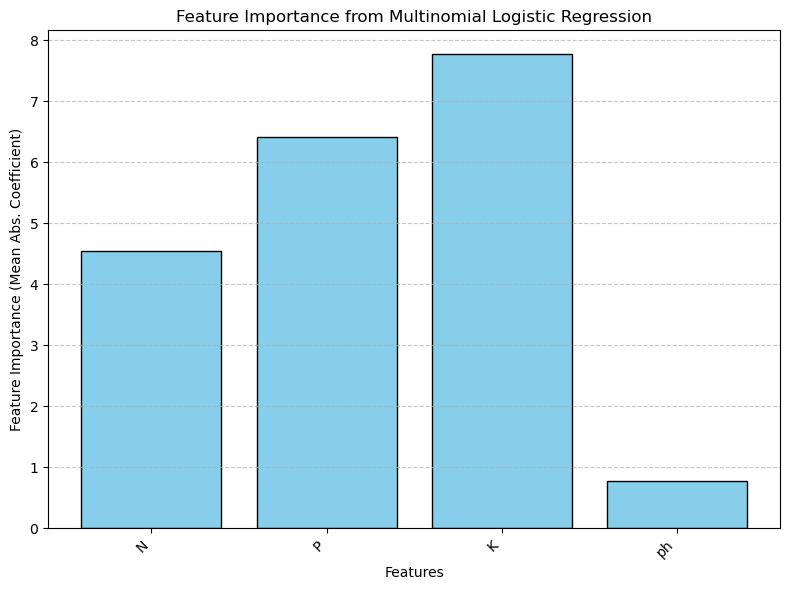

In [7]:

# Get feature importance
feature_importance = np.abs(logreg.coef_).mean(axis=0)
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importance, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Feature Importance (Mean Abs. Coefficient)")
plt.xlabel("Features")
plt.title("Feature Importance from Multinomial Logistic Regression")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Random Forest Model Training and Evaluation

### Model Training
- **Model**: Random Forest Classifier
- **Parameters**: `random_state=42` for reproducibility, `class_weight='balanced'` to handle class imbalance
- **Action**: Fits the model to the training data


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8068181818181818
